# Color transfert by regularized optimal transport
In this notebook, we show how to use `Sinkhorn.py` to resolve entropy-regularized optimal tranport and apply it to color transfert:
- Initialization of variables 
    - optimal transport: images, marginals, costs, parameters
    - Sinkhorn projection: kernel, parameters
- Computations
    - Sinkorn projection
    - optimal coupling
    - resulting images
- display the results

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
%load_ext autoreload
%autoreload 2

from sinkhorn import sinkhorn_debug
from builders import image2array, array2cost, image2array, transfer_color, array2image, array2matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialization of variables:

In [12]:
N = 100 # heigth of the image (= width)
n = N^2 # number of pixels
eta = 15 # lent si plus que ~20
delta = 1e-15 # tolerance for Sinkhorn()
img1_nbr = '3'
img2_nbr = '1'
img1 = image2array('img' + img1_nbr + '_' + str(N) + '.jpg') # source image
img2 = image2array('img' + img2_nbr + '_' + str(N) + '.jpg') # target image
C, p, q = array2cost(img1, img2) # cost and coupling marginals
Kmat = np.exp(-eta * C) # kernel to project 

def K(v):
    ''' Kernel-vector matrix product'''
    return Kmat @ v
def Kt(v):
    ''' Transposed_kernel-vector matrix product'''
    return (Kmat.T) @ v

## Sinkhorn projection computation:

In [13]:
u,v,W,norm_u,norm_v,err = sinkhorn_debug(K,Kt,p,q,delta,maxtime=60)
P = u*Kmat*v.T # coupling

W = -15.131681494844589
Marginal error: 4.700016417724662e-16


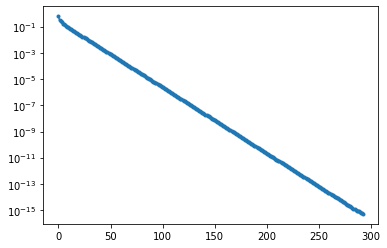

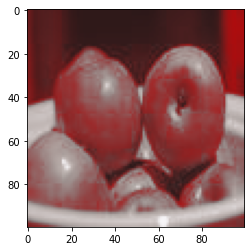

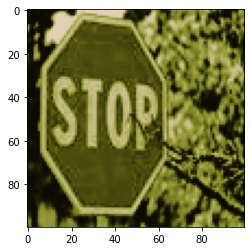

In [14]:
# Display
print("W =",W)
print("Marginal error:",err[-1])
plt.semilogy(err[:-1],".-")
# Compute resulting image
img12 = transfer_color(P,img1) # target image with source colors
img21 = transfer_color(P.T,img2) # symetry of problem
# show images:
plt.figure()
plt.imshow(array2matrix(img12),vmin=0, vmax=1)
plt.figure()
plt.imshow(array2matrix(img21),vmin=0, vmax=1)

In [15]:
# save in files
# array2image('img' + img1_nbr + img2_nbr + '.jpg', img12)
# array2image('img' + img2_nbr + img1_nbr + '.jpg', img21)